## Лабораторная работа 4
## Водяный Михаил
## РИМ-181228

In [1]:
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2yuv, yuv2rgb
from skimage import img_as_ubyte
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from skimage import data
%matplotlib inline
plt.gray()

<Figure size 432x288 with 0 Axes>

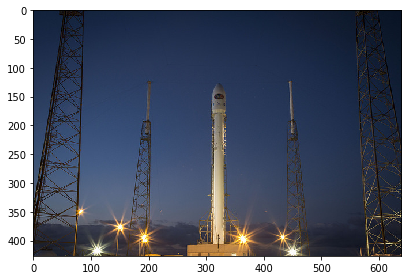

In [2]:
img = data.rocket()
imshow(img)

 ## Стандартный фильтр для выделения скачков яркости

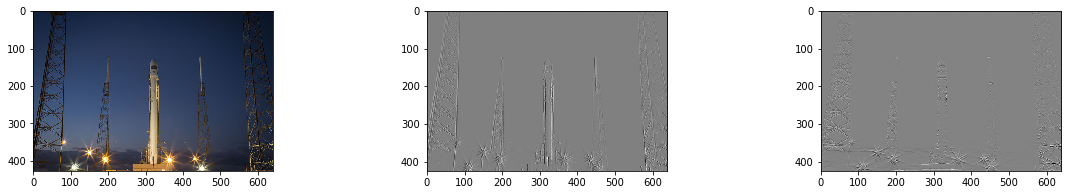

In [3]:
Dx = np.array([[ 0, 0, 0], 
               [-1, 0, 1], 
               [ 0, 0, 0]])

Dy = np.array([[0,  1, 0], 
               [0,  0, 0], 
               [0, -1, 0]])

img_Dx = convolve2d(rgb2gray(img), Dx, mode = "valid")
img_Dy = convolve2d(rgb2gray(img), Dy, mode = "valid")

plt.figure(figsize=(20,10))
plt.subplot(3, 3, 1)
plt.imshow(img)
plt.subplot(3, 3, 2)
plt.imshow(img_Dx)
plt.subplot(3, 3, 3)
plt.imshow(img_Dy)

## Фильтр Превитта

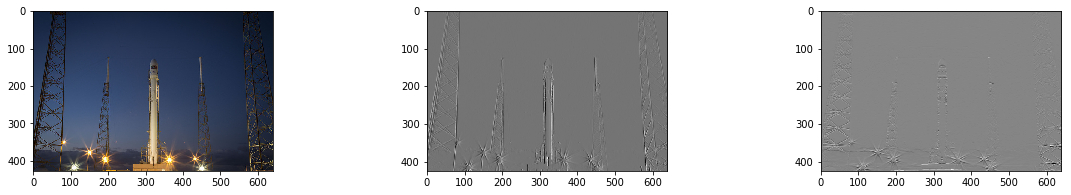

In [4]:
Px = np.array([[-1, 0, 1], 
               [-1, 0, 1], 
               [-1, 0, 1]])

Py = np.array([[ 1,  1,  1], 
               [ 0,  0,  0], 
               [-1, -1, -1]])

img_Px = convolve2d(rgb2gray(img), Px, mode = "valid")
img_Py = convolve2d(rgb2gray(img), Py, mode = "valid")


plt.figure(figsize=(20,10))
plt.subplot(3, 3, 1)
plt.imshow(img)
plt.subplot(3, 3, 2)
plt.imshow(img_Px)
plt.subplot(3, 3, 3)
plt.imshow(img_Py)

##  Фильтр Собеля

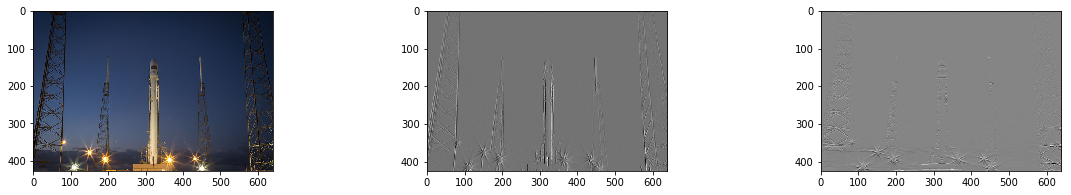

In [5]:
Sx = np.array([[-1, 0, 1], 
                      [-2, 0, 2], 
                      [-1, 0, 1]])

Sy = np.array([[ 1,  2,  1], 
                      [ 0,  0,  0], 
                      [-1, -2, -1]])

img_Sx = convolve2d(rgb2gray(img), Sx, mode = "valid")
img_Sy = convolve2d(rgb2gray(img), Sy, mode = "valid")

plt.figure(figsize=(20,10))
plt.subplot(3, 3, 1)
plt.imshow(img)
plt.subplot(3, 3, 2)
plt.imshow(img_Sx)
plt.subplot(3, 3, 3)
plt.imshow(img_Sy)

## Разностный аналог Лапласиана

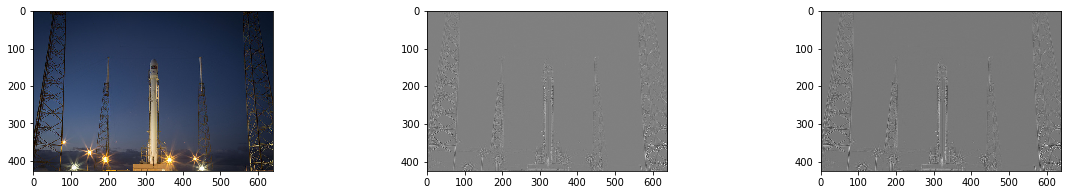

In [6]:
L1 = np.array([[ 0, -1,  0], 
               [-1,  4, -1], 
               [ 0, -1,  0]])

L2 = np.array([[-1, -1, -1], 
               [-1,  8, -1], 
               [-1, -1, -1]])

img_L1 = convolve2d(rgb2gray(img), L1, mode = "valid")
img_L2 = convolve2d(rgb2gray(img), L2, mode = "valid")

plt.figure(figsize=(20,10))
plt.subplot(3, 3, 1)
plt.imshow(img)
plt.subplot(3, 3, 2)
plt.imshow(img_L1)
plt.subplot(3, 3, 3)
plt.imshow(img_L2)

## Фильтр тиснения

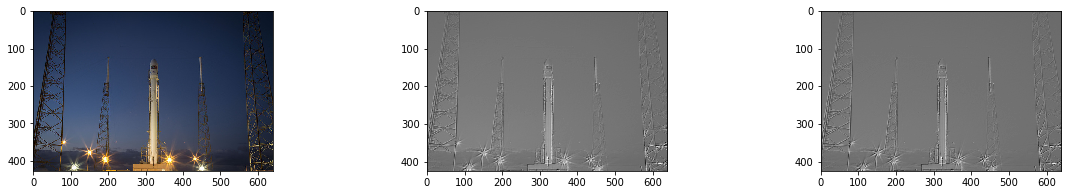

In [7]:
E1 = np.array([[-2, 0, 0], 
               [ 0, 1, 0], 
               [ 0, 0, 2]])

E2 = np.array([[-2, -1, 0], 
               [-1,  1, 1], 
               [ 0,  1, 2]])

img_E1 = convolve2d(rgb2gray(img), E1, mode = "valid")
img_E2 = convolve2d(rgb2gray(img), E2, mode = "valid")

plt.figure(figsize=(20,10))
plt.subplot(3, 3, 1)
plt.imshow(img)
plt.subplot(3, 3, 2)
plt.imshow(img_E1)
plt.subplot(3, 3, 3)
plt.imshow(img_E2)

## Фильтр повышения резкости

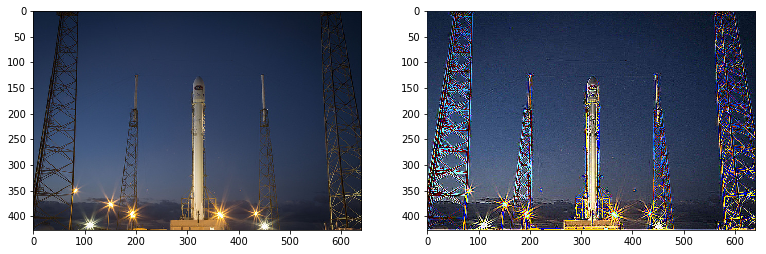

In [8]:
def high_contrast(img):
    img = rgb2yuv(img)
    Y, U, V = img[:,:,0], img[:,:,1], img[:,:,2]
    
    Y = convolve2d(Y, hc, mode = "same")
    U = convolve2d(U, hc, mode = "same")
    V = convolve2d(V, hc, mode = "same")
    Y = np.clip(Y, 0, 1)
    img = np.clip(yuv2rgb(np.dstack((Y,U,V))), 0, 1)
    
    return img

hc = np.array([[-1, -1, -1], 
               [-1,  9, -1], 
               [-1, -1, -1]])

img_hc = convolve2d(rgb2gray(img), hc, mode = "valid")

plt.figure(figsize=(20,10))
plt.subplot(2, 3, 1)
plt.imshow(img)
plt.subplot(2, 3, 2)
plt.imshow(high_contrast(img))